## Iris 데이터셋 t-SNE 이용하여 차원 축소

#### 라이브러리 및 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

C:\Users\user\AppData\Local\Temp\ipykernel_14620\3264317664.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### 데이터셋 불러오기

In [2]:
# 데이터셋 로드
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris.data, iris.target] , 
                  columns= ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

#### t-SNE 사용하여 2차원으로 차원 축소

In [3]:
# class target 정보 제외
train_df = df[['sepal length', 'sepal width', 'petal length', 'petal width']]

# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

tsne_df.head()

,component 0,component 1
0,-21.817776,-4.615271
1,-24.617252,-5.118551
2,-24.218214,-3.954883
3,-24.752218,-4.249682
4,-21.751558,-4.182110


#### 추출한 주성분을 이용하여 꽃 종류별 시각화

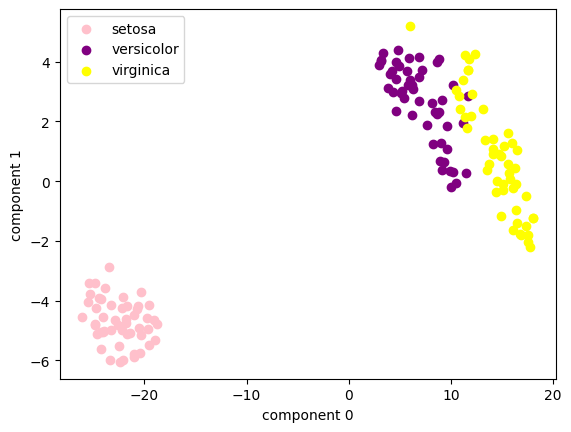

In [4]:
# class target 정보 불러오기 
tsne_df['target'] = df['target']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

# target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'setosa')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 'versicolor')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'virginica')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

#### t-SNE 사용하여 3차원으로 차원 축소

In [5]:
# 3차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 3).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1', 'component 2'])

tsne_df.head()

,component 0,component 1,component 2
0,-13.109592,16.771564,-2.284623
1,-38.044868,-1.763867,-19.829369
2,-28.565031,-4.049705,1.973342
3,-53.153519,-3.082335,1.328797
4,-18.830917,16.847248,9.123191


#### 추출한 주성분을 이용하여 꽃 종류별 시각화

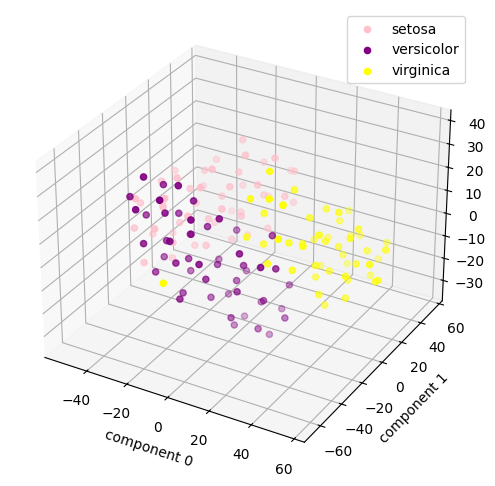

In [6]:
# 3차원 그래프 세팅
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# class target 정보 불러오기 
tsne_df['target'] = df['target']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

# target 별 시각화
ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], tsne_df_0['component 2'], color = 'pink', label = 'setosa')
ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], tsne_df_1['component 2'], color = 'purple', label = 'versicolor')
ax.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], tsne_df_2['component 2'], color = 'yellow', label = 'virginica')

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()